# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра density=True, для старых версий matplotlib normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Для работы возьмем 
<a href="https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE"> распределение Парето </a>

Text(0,0.5,'f(x)')

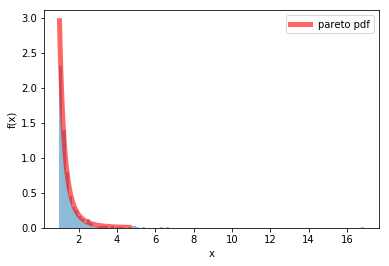

In [16]:
from scipy.stats import pareto
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#сгенерируем выборку из 1000 элементов со значением b = 3.0 и scale=1
b = 3.0
rs = pareto.rvs(b,scale=1,size=1000)

plt.hist(rs, 100, density=True, histtype='stepfilled', alpha=0.5)

# теперь постороим теоретическую функцию плотности вероятности поверх начального графика
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)
plt.plot(x, pareto.pdf(x, b),'r-', lw=5, alpha=0.6, label='pareto pdf')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)')


Text(0,0.5,'fraction of samples')

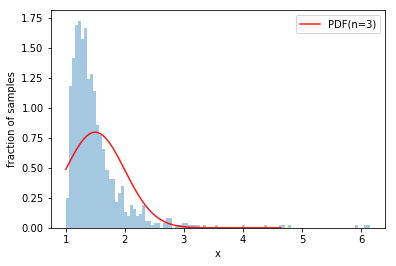

In [19]:
#создадим список выборочных средних из 1000 выборок, размером n = 3

#определяем матожидание и дисперсию для распределения Паретто со значением b = 3.0 и scale=1 . это будет 1.5 и 0.75
mean, var = pareto.stats(3., moments='mv')
#тоже самое можно сделать по формулам:
#mean = 3.0/2 #теоретическое мат.ожидание
#variance = ((1.0/2)**2)*(3) #теоретическая дисперсия

m_sample3 =  []

for i in xrange(1000):
    sample = pareto.rvs(b,scale=1,size=3)
    m_sample3.append(np.mean(sample))

#построим гистограмму для этого распределения    
plt.hist(m_sample3, 100, normed=True, histtype='stepfilled', alpha=0.4)
#и функцию плотности 
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)
plt.plot(x, norm.pdf(x, mean, np.sqrt(var/3.)),'r', alpha=0.9,label='PDF(n=3)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('fraction of samples')


Text(0,0.5,'fraction of samples')

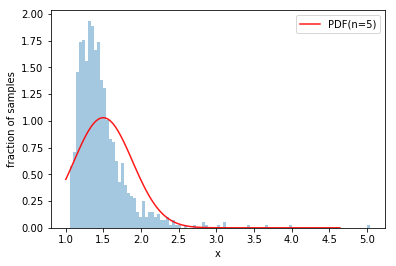

In [20]:
#создадим список выборочных средних из 1000 выборок, размером n = 5

m_sample5 =  []

for i in xrange(1000):
    sample = pareto.rvs(b,scale=1,size=5)
    m_sample5.append(np.mean(sample))

#построим гистограмму для этого распределения    
plt.hist(m_sample5, 100, normed=True, histtype='stepfilled', alpha=0.4)
#и функцию плотности
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)
plt.plot(x, norm.pdf(x, mean, np.sqrt(var/5.)),'r', alpha=0.9,label='PDF(n=5)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('fraction of samples')

Text(0,0.5,'fraction of samples')

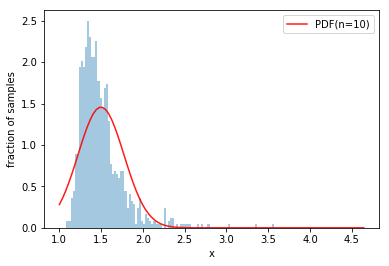

In [21]:
#создадим список выборочных средних из 1000 выборок, размером n = 10
m_sample10 =  []

for i in xrange(1000):
    sample = pareto.rvs(b,scale=1,size=10)
    m_sample10.append(np.mean(sample))

#построим гистограмму для этого распределения    
plt.hist(m_sample10, 100, normed=True, histtype='stepfilled', alpha=0.4)
#и функцию плотности
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)
plt.plot(x, norm.pdf(x, mean, np.sqrt(var/10.)),'r', alpha=0.9,label='PDF(n=10)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('fraction of samples')

Text(0,0.5,'fraction of samples')

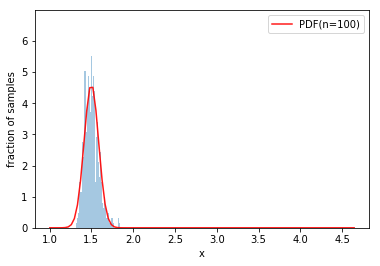

In [24]:
#создадим список выборочных средних из 1000 выборок, размером n = 100
m_sample100 =  []

for i in xrange(1000):
    sample = pareto.rvs(b,scale=1,size=100)
    m_sample100.append(np.mean(sample))

#построим гистограмму для этого распределения    
plt.hist(m_sample100, 100, normed=True, histtype='stepfilled', alpha=0.4)
#и функцию плотности
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)
plt.plot(x, norm.pdf(x, mean, np.sqrt(var/100.)),'r', alpha=0.9,label='PDF(n=100)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('fraction of samples')

# Вывод
При увеличении размеров выборки распределение выборочных средних все больше приближается к нормальному, дисперсия уменьшается.